In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib as mpl
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True) 
mpl.style.use('seaborn')
pd.set_option('display.max_columns', 1000)

In [8]:
df=pd.read_csv("forex_dataframe_new.csv")
df.columns = df.columns.str.replace('.','_')


In [9]:
df.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,PC2_AUD_H4,PC7_AUD_H4,PC14_AUD_H4,PC20_AUD_H4,PC50_AUD_H4,STDEV_AUD_H4_1p,STDEV_AUD_H4_2p,STDEV_AUD_H4_4p,STDEV_AUD_H4_7p,STDEV_AUD_H4_10p,STDEV_AUD_H4_14p,STDEV_AUD_H4_20p,CS_AUD_CAD_H4_7,correl_AUD_CAD_7p,CS_AUD_CAD_H4_10,correl_AUD_CAD_10p,CS_AUD_CAD_H4_20,correl_AUD_CAD_20p,CS_AUD_CHF_H4_7,correl_AUD_CHF_7p,CS_AUD_CHF_H4_10,correl_AUD_CHF_10p,CS_AUD_CHF_H4_20,correl_AUD_CHF_20p,CS_AUD_GBP_H4_7,correl_AUD_GBP_7p,CS_AUD_GBP_H4_10,correl_AUD_GBP_10p,CS_AUD_GBP_H4_20,correl_AUD_GBP_20p,CS_AUD_JPY_H4_7,correl_AUD_JPY_7p,CS_AUD_JPY_H4_10,correl_AUD_JPY_10p,CS_AUD_JPY_H4_20,correl_AUD_JPY_20p,CS_EUR_AUD_H4_7,correl_EUR_AUD_7p,CS_EUR_AUD_H4_10,correl_EUR_AUD_10p,CS_EUR_AUD_H4_20,correl_EUR_AUD_20p,target1,target2,target3,class_target1,class_target2,class_target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,M

In [10]:
df['target1'] = df['bid_close'].shift(-1)
df['target2'] = df['bid_close'].shift(-2)
df['target3'] = df['bid_close'].shift(-3)

In [11]:
df['PC_AUD_H4_target1'] = ((df['target1']-df['bid_close'])/df['bid_close'])*100
df['PC_AUD_H4_target2'] = ((df['target2']-df['bid_close'])/df['bid_close'])*100
df['PC_AUD_H4_target3'] = ((df['target3']-df['bid_close'])/df['bid_close'])*100

In [12]:
#df['trend_ema']=ta.trend.ema_indicator(df['bid_close'], n=12, fillna=True)
#df['trend_adx']=ta.trend.adx(df['bid_high'], df['bid_low'], df['bid_close'], n=14, fillna=True)

In [13]:
df_final = df

In [20]:
#df_final1=df_final.set_index('time_local')

In [21]:
#df_final=df.copy()
df_final=df_final.dropna(how='all')

In [24]:
#df_final=df_final.drop(['VOL_BOLLINGER_L_BANDS_AUD1','VOL_BOLLINGER_BANDS_AUD1'],axis=1)

In [25]:
df_final.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,target1,target2,target3,class_target1,class_target2,class_target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLI

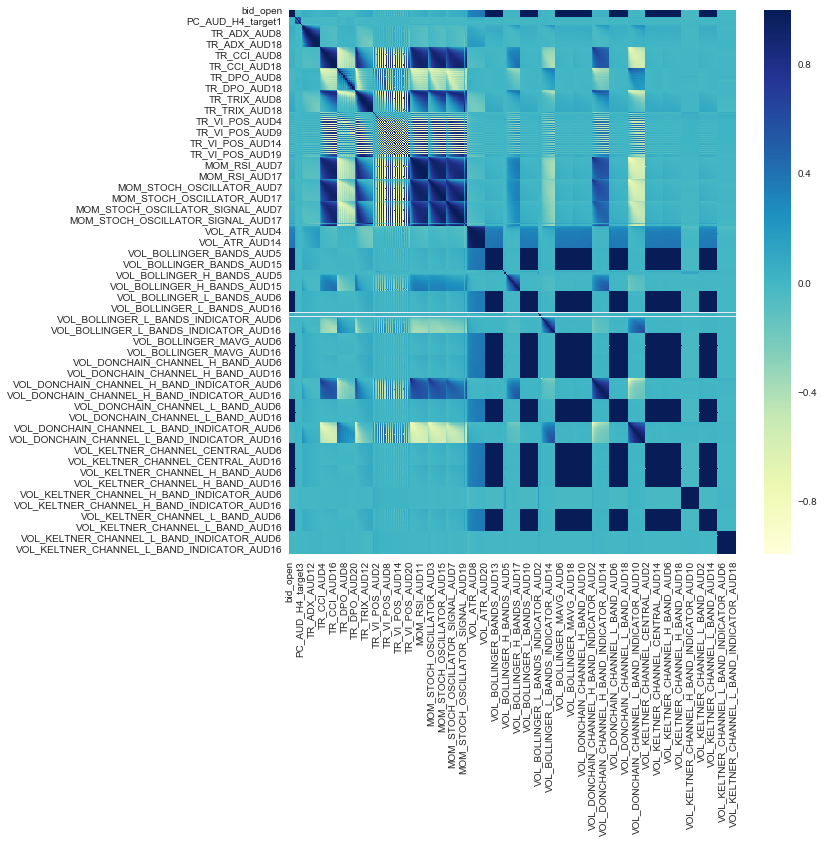

In [26]:
import seaborn as sns
#plt.figure(figsize=(10,10))
#sns.heatmap(df_final.corr(),center=0,annot=True)

corrmat = df_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_final[top_corr_features].corr(),cmap="YlGnBu")

In [27]:
df_final= pd.DataFrame(df_final)

In [28]:
df_final.shape

(15269, 498)

In [29]:
#df_final2=df_final.dropna(axis=0)
df_final2=df_final

In [30]:
df_final2.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,target1,target2,target3,class_target1,class_target2,class_target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLI

In [31]:
macro_economic_data=pd.read_excel(r"2007 to Jan 2019 Macro Economic Data.xlsx")

In [32]:
macro_economic_data_AUD=macro_economic_data[(macro_economic_data['Currency']=='AUD') ]

In [33]:
from datetime import datetime, timedelta

In [34]:
macro_economic_data_AUD['DateTime (GMT)']=macro_economic_data_AUD['DateTime (GMT)']+timedelta(hours=4)

In [35]:
macro_economic_data_AUD['Date']=pd.DatetimeIndex(macro_economic_data_AUD['DateTime (GMT)']).date

In [36]:
macro_economic_data_AUD.head()

,DateTime (GMT),Currency,Name,Country,Volatility,Actual,Previous,Consensus,Date
2,2007-01-22 05:30:00,AUD,Producer Price Index (QoQ),Australia,0,0.24,NaN,0.5,2007-01-22
3,2007-02-08 04:30:00,AUD,Unemployment Rate s.a.,Australia,1,4.50,NaN,4.6,2007-02-08
4,2007-02-08 04:30:00,AUD,Employment Change s.a.,Australia,0,-4.00,NaN,3.0,2007-02-08
65,2007-02-21 04:30:00,AUD,Wage Price Index (QoQ),Australia,1,1.10,NaN,1.0,2007-02-21
66,2007-02-21 04:30:00,AUD,Wage Price Index (YoY),Australia,1,4.00,NaN,3.9,2007-02-21


In [37]:
macro_economic_data_AUD['PC_macro_economic_ind'] = ( macro_economic_data_AUD['Actual'] - macro_economic_data_AUD['Previous'] ) / macro_economic_data_AUD['Previous'] 

In [38]:
macro_economic_data_AUD['PC_macro_economic_ind'].fillna(0,inplace=True)

In [39]:
macro_economic_data_AUD_summary=macro_economic_data_AUD.groupby(['Date'])['Volatility', 'PC_macro_economic_ind' ].mean().reset_index()

In [40]:
macro_economic_data_AUD_summary.head()

,Date,Volatility,PC_macro_economic_ind
0,2007-01-22,0.0,0.0
1,2007-02-08,0.5,0.0
2,2007-02-21,1.0,0.0
3,2007-03-15,1.0,-6.8
4,2007-04-03,1.0,0.0


In [41]:
macro_economic_data_AUD_summary.rename(index=str, inplace=True, columns={"Volatility": "Volatility_AUD", "PC_macro_economic_ind": "PC_macro_economic_ind_AUD"})

In [42]:
macro_economic_data_USD=macro_economic_data[(macro_economic_data['Currency']=='USD') ]

In [43]:
from datetime import datetime, timedelta

In [44]:
macro_economic_data_USD['DateTime (GMT)']=macro_economic_data_USD['DateTime (GMT)']+timedelta(hours=4)

In [45]:
macro_economic_data_USD['Date']=pd.DatetimeIndex(macro_economic_data_USD['DateTime (GMT)']).date

In [46]:
macro_economic_data_USD.head()

,DateTime (GMT),Currency,Name,Country,Volatility,Actual,Previous,Consensus,Date
22,2007-02-13 17:30:00,USD,Trade Balance,United States,2,-61.45,NaN,-59.5,2007-02-13
30,2007-02-14 17:30:00,USD,Retail Sales ex Autos (MoM),United States,0,0.20,NaN,0.3,2007-02-14
31,2007-02-14 17:30:00,USD,Retail Sales (MoM),United States,3,0.50,NaN,0.3,2007-02-14
32,2007-02-14 19:00:00,USD,Business Inventories,United States,1,0.00,NaN,0.3,2007-02-14
38,2007-02-15 17:30:00,USD,Import Price Index (YoY),United States,2,1.00,NaN,0.0,2007-02-15


In [47]:
macro_economic_data_USD['PC_macro_economic_ind'] = ( macro_economic_data_USD['Actual'] - macro_economic_data_USD['Previous'] ) / macro_economic_data_USD['Previous'] 

In [48]:
macro_economic_data_USD['PC_macro_economic_ind'].fillna(0,inplace=True)

In [49]:
macro_economic_data_USD_summary=macro_economic_data_USD.groupby(['Date'])['Volatility', 'PC_macro_economic_ind' ].mean().reset_index()

In [50]:
macro_economic_data_USD_summary.head()

,Date,Volatility,PC_macro_economic_ind
0,2007-02-13,2.000000,0.0
1,2007-02-14,1.333333,0.0
2,2007-02-15,2.000000,0.0
3,2007-02-16,2.000000,0.0
4,2007-02-21,1.600000,0.0


In [51]:
macro_economic_data_USD_summary.rename(index=str, inplace=True, columns={"Volatility": "Volatility_USD", "PC_macro_economic_ind": "PC_macro_economic_ind_USD"})

In [52]:
import calendar

In [53]:
df_final2['date_local']=pd.DatetimeIndex(df_final2['time_local']).date
df_final2['time_local']=pd.to_datetime(df_final2['time_local'])
df_final2['time_local']=df_final2['time_local'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [54]:
df_final_3=pd.merge(df_final2,macro_economic_data_AUD_summary,how='left',right_on='Date',left_on='date_local')

In [55]:
df_final_3=pd.merge(df_final_3,macro_economic_data_USD_summary,how='left',right_on='Date',left_on='date_local')

In [56]:
df_final_3['year']=pd.DatetimeIndex(df_final_3['time_local']).year
df_final_3['month']=pd.DatetimeIndex(df_final_3['time_local']).month
df_final_3['day']=pd.DatetimeIndex(df_final_3['time_local']).day
df_final_3['hour']=pd.DatetimeIndex(df_final_3['time_local']).hour
df_final_3['dayofweek']=pd.DatetimeIndex(df_final_3['time_local']).dayofweek

In [57]:
df_final_3.head()

,time_local,start_time_local,end_time_local,bid_open,bid_high,bid_low,bid_close,target1,target2,target3,class_target1,class_target2,class_target3,PC_AUD_H4_target1,PC_AUD_H4_target2,PC_AUD_H4_target3,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLI

In [58]:
X= df_final_3[df_final_3['year'] < 2018]
s=X[['year','month', 'dayofweek']]
for each in s:
    dummies = pd.get_dummies(s[each], prefix=each, drop_first=False)
    X=X.drop([each],axis=1)
    X = pd.concat([X, dummies], axis=1)

In [59]:
X.shape
#X.head()

(13554, 534)

In [60]:
X=X.drop(['time_local','start_time_local','end_time_local','class_target1','class_target2','class_target3', 'target2', 'target3','PC_AUD_H4_target2','PC_AUD_H4_target1','PC_AUD_H4_target3','Date_x', 'Date_y', 'date_local'],axis=1)

#'class_target1'

In [61]:
#X.isnull().sum()

In [62]:
X.fillna(0,inplace=True)

In [63]:
obj=X.loc[:, X.dtypes =='object']
for col in obj:
    obj[col] = pd.to_numeric(obj[col], errors='coerce')
X[obj.columns]=obj
X=X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [64]:
#X.to_csv("preciting_target_1.csv",index=False)

In [65]:
#y=np.exp(X['target1'])
X['target1']=X['target1']*10000
y=X['target1']
X=X.drop(['target1'],axis=1)

In [66]:
X.head()


,bid_open,bid_high,bid_low,bid_close,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_H_BANDS_AUD1,VOL_BOLLINGER_H

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.seed=0

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(8551, 519) (8551,)
(3666, 519) (3666,)


In [69]:
'''from sklearn.model_selection import GridSearchCV
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)'''

'from sklearn.model_selection import GridSearchCV\nalphas = np.array([1,0.1,0.01,0.001,0.0001,0])\n# create and fit a ridge regression model, testing each alpha\nmodel = Lasso()\ngrid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))\ngrid.fit(X_train,y_train)'

In [70]:
#grid.best_params_

In [71]:
#clf = linear_model.Lasso(alpha=0)
clf=Ridge()
#clf=LinearRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [72]:
ridge_train_score = clf.score(X_train,y_train)

In [73]:
ridge_train_score

0.9995519051984513

In [ ]:
#n = number of sample size , p = number of independent variables 
#r2 = 1-(1-R2)*(n-1)/(n-p-1) 

In [76]:
yhat=clf.predict(X_train)
SS_Residual=sum((y_train-yhat)**2)
SS_Total=sum((y_train-np.mean(y_train))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print (r_squared, adjusted_r_squared )

0.9995519051984514 0.9995229472602116


In [74]:
yhat=clf.predict(X_test)
SS_Residual=sum((y_test-yhat)**2)
SS_Total=sum((y_test-np.mean(y_test))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared )

0.9995108713933504 0.999430179166125


In [77]:

r2_score(y_test,y_pred)

0.9995108713933504

In [78]:
ridge_coef = clf.coef_

In [79]:
#!pip install yellowbrick

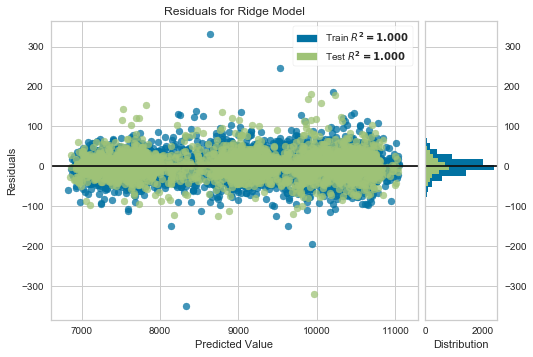

In [80]:

from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()


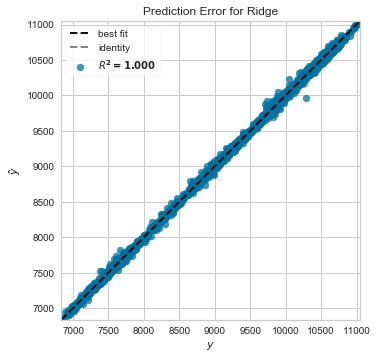

In [81]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
lasso = Ridge()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

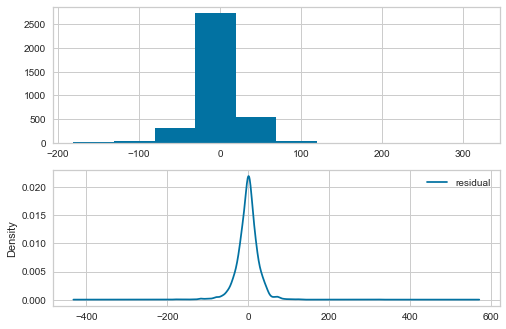

In [82]:
from pandas import Series
from matplotlib import pyplot
series = (y_test-y_pred)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde',label='residual')
pyplot.legend()

In [83]:
y_test1=pd.DataFrame(y_test)
y_pred1=pd.DataFrame(y_pred)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred']


In [84]:
y_pred1.index=y_test1.index

In [85]:
df_plot=pd.concat([X_test,y_test1,y_pred1],axis=1)

In [86]:
df_plot.head()

,bid_open,bid_high,bid_low,bid_close,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_H_BANDS_AUD1,VOL_BOLLINGER_H

In [87]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [88]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

18.137865378812638

In [89]:
rmse_val = rmse(y_test, y_pred)
print("rms error is: " + str(rmse_val))

rms error is: 26.532939019226397


In [90]:
df_plot['diff']=abs(df_plot['y_test']-df_plot['y_pred'])
df_plot['diff_bid_close']=abs(df_plot['y_test']-df_plot['bid_close']*10000)
sorted_df=df_plot.sort_values(by='diff',ascending=False)

In [91]:
sorted_df.head(10)

,bid_open,bid_high,bid_low,bid_close,TR_ADX_AUD1,TR_ADX_AUD2,TR_ADX_AUD3,TR_ADX_AUD4,TR_ADX_AUD5,TR_ADX_AUD6,TR_ADX_AUD7,TR_ADX_AUD8,TR_ADX_AUD9,TR_ADX_AUD10,TR_ADX_AUD11,TR_ADX_AUD12,TR_ADX_AUD13,TR_ADX_AUD14,TR_ADX_AUD15,TR_ADX_AUD16,TR_ADX_AUD17,TR_ADX_AUD18,TR_ADX_AUD19,TR_ADX_AUD20,TR_CCI_AUD1,TR_CCI_AUD2,TR_CCI_AUD3,TR_CCI_AUD4,TR_CCI_AUD5,TR_CCI_AUD6,TR_CCI_AUD7,TR_CCI_AUD8,TR_CCI_AUD9,TR_CCI_AUD10,TR_CCI_AUD11,TR_CCI_AUD12,TR_CCI_AUD13,TR_CCI_AUD14,TR_CCI_AUD15,TR_CCI_AUD16,TR_CCI_AUD17,TR_CCI_AUD18,TR_CCI_AUD19,TR_CCI_AUD20,TR_DPO_AUD1,TR_DPO_AUD2,TR_DPO_AUD3,TR_DPO_AUD4,TR_DPO_AUD5,TR_DPO_AUD6,TR_DPO_AUD7,TR_DPO_AUD8,TR_DPO_AUD9,TR_DPO_AUD10,TR_DPO_AUD11,TR_DPO_AUD12,TR_DPO_AUD13,TR_DPO_AUD14,TR_DPO_AUD15,TR_DPO_AUD16,TR_DPO_AUD17,TR_DPO_AUD18,TR_DPO_AUD19,TR_DPO_AUD20,TR_TRIX_AUD1,TR_TRIX_AUD2,TR_TRIX_AUD3,TR_TRIX_AUD4,TR_TRIX_AUD5,TR_TRIX_AUD6,TR_TRIX_AUD7,TR_TRIX_AUD8,TR_TRIX_AUD9,TR_TRIX_AUD10,TR_TRIX_AUD11,TR_TRIX_AUD12,TR_TRIX_AUD13,TR_TRIX_AUD14,TR_TRIX_AUD15,TR_TRIX_AUD16,TR_TRIX_AUD17,TR_TRIX_AUD18,TR_TRIX_AUD19,TR_TRIX_AUD20,TR_VI_NEG_AUD1,TR_VI_POS_AUD1,TR_VI_NEG_AUD2,TR_VI_POS_AUD2,TR_VI_NEG_AUD3,TR_VI_POS_AUD3,TR_VI_NEG_AUD4,TR_VI_POS_AUD4,TR_VI_NEG_AUD5,TR_VI_POS_AUD5,TR_VI_NEG_AUD6,TR_VI_POS_AUD6,TR_VI_NEG_AUD7,TR_VI_POS_AUD7,TR_VI_NEG_AUD8,TR_VI_POS_AUD8,TR_VI_NEG_AUD9,TR_VI_POS_AUD9,TR_VI_NEG_AUD10,TR_VI_POS_AUD10,TR_VI_NEG_AUD11,TR_VI_POS_AUD11,TR_VI_NEG_AUD12,TR_VI_POS_AUD12,TR_VI_NEG_AUD13,TR_VI_POS_AUD13,TR_VI_NEG_AUD14,TR_VI_POS_AUD14,TR_VI_NEG_AUD15,TR_VI_POS_AUD15,TR_VI_NEG_AUD16,TR_VI_POS_AUD16,TR_VI_NEG_AUD17,TR_VI_POS_AUD17,TR_VI_NEG_AUD18,TR_VI_POS_AUD18,TR_VI_NEG_AUD19,TR_VI_POS_AUD19,TR_VI_NEG_AUD20,TR_VI_POS_AUD20,MOM_AO_AUD,MOM_RSI_AUD1,MOM_RSI_AUD2,MOM_RSI_AUD3,MOM_RSI_AUD4,MOM_RSI_AUD5,MOM_RSI_AUD6,MOM_RSI_AUD7,MOM_RSI_AUD8,MOM_RSI_AUD9,MOM_RSI_AUD10,MOM_RSI_AUD11,MOM_RSI_AUD12,MOM_RSI_AUD13,MOM_RSI_AUD14,MOM_RSI_AUD15,MOM_RSI_AUD16,MOM_RSI_AUD17,MOM_RSI_AUD18,MOM_RSI_AUD19,MOM_RSI_AUD20,MOM_STOCH_OSCILLATOR_AUD1,MOM_STOCH_OSCILLATOR_AUD2,MOM_STOCH_OSCILLATOR_AUD3,MOM_STOCH_OSCILLATOR_AUD4,MOM_STOCH_OSCILLATOR_AUD5,MOM_STOCH_OSCILLATOR_AUD6,MOM_STOCH_OSCILLATOR_AUD7,MOM_STOCH_OSCILLATOR_AUD8,MOM_STOCH_OSCILLATOR_AUD9,MOM_STOCH_OSCILLATOR_AUD10,MOM_STOCH_OSCILLATOR_AUD11,MOM_STOCH_OSCILLATOR_AUD12,MOM_STOCH_OSCILLATOR_AUD13,MOM_STOCH_OSCILLATOR_AUD14,MOM_STOCH_OSCILLATOR_AUD15,MOM_STOCH_OSCILLATOR_AUD16,MOM_STOCH_OSCILLATOR_AUD17,MOM_STOCH_OSCILLATOR_AUD18,MOM_STOCH_OSCILLATOR_AUD19,MOM_STOCH_OSCILLATOR_AUD20,MOM_STOCH_OSCILLATOR_SIGNAL_AUD1,MOM_STOCH_OSCILLATOR_SIGNAL_AUD2,MOM_STOCH_OSCILLATOR_SIGNAL_AUD3,MOM_STOCH_OSCILLATOR_SIGNAL_AUD4,MOM_STOCH_OSCILLATOR_SIGNAL_AUD5,MOM_STOCH_OSCILLATOR_SIGNAL_AUD6,MOM_STOCH_OSCILLATOR_SIGNAL_AUD7,MOM_STOCH_OSCILLATOR_SIGNAL_AUD8,MOM_STOCH_OSCILLATOR_SIGNAL_AUD9,MOM_STOCH_OSCILLATOR_SIGNAL_AUD10,MOM_STOCH_OSCILLATOR_SIGNAL_AUD11,MOM_STOCH_OSCILLATOR_SIGNAL_AUD12,MOM_STOCH_OSCILLATOR_SIGNAL_AUD13,MOM_STOCH_OSCILLATOR_SIGNAL_AUD14,MOM_STOCH_OSCILLATOR_SIGNAL_AUD15,MOM_STOCH_OSCILLATOR_SIGNAL_AUD16,MOM_STOCH_OSCILLATOR_SIGNAL_AUD17,MOM_STOCH_OSCILLATOR_SIGNAL_AUD18,MOM_STOCH_OSCILLATOR_SIGNAL_AUD19,MOM_STOCH_OSCILLATOR_SIGNAL_AUD20,MOM_TSI_AUD,MOM_UO_AUD,MOM_WR_AUD,VOL_ATR_AUD1,VOL_ATR_AUD2,VOL_ATR_AUD3,VOL_ATR_AUD4,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_H_BANDS_AUD1,VOL_BOLLINGER_H

In [92]:
len(sorted_df[(sorted_df['diff_bid_close']>100) & (sorted_df['diff'] >100)]) 

25

In [93]:
len(sorted_df[(sorted_df['diff_bid_close']>100) & (sorted_df['diff'] <100)]) 

1

In [94]:
len(sorted_df[(sorted_df['diff_bid_close']>50) & (sorted_df['diff'] >50)]) 

157

In [95]:
len(sorted_df[(sorted_df['diff_bid_close']>50) & (sorted_df['diff'] <19)]) 

0

In [96]:
len(sorted_df[(sorted_df['diff_bid_close']<19) & (sorted_df['diff'] >100)]) 

0

In [97]:
len(sorted_df[(sorted_df['diff_bid_close']<19) & (sorted_df['diff'] <100)]) 


2462

In [85]:
###### Co-relation to reduce feature set.

In [86]:
li=sorted_df[sorted_df.columns[1:]].corr()['y_test'][:-1].to_frame().reset_index()
li.dropna(axis=0,inplace=True)

In [87]:
sorted_Df2=li.sort_values(by='y_test',ascending=False)


In [88]:
cols_new=li.loc[(li['y_test'] >= 0.3) | (li['y_test'] <= -0.3)]['index'].tolist()

In [89]:
cols_new.remove('y_test')
cols_new.remove('y_pred')

In [90]:
cols_new

['bid_high',
 'bid_low',
 'bid_close',
 'VOL_BOLLINGER_BANDS_AUD2',
 'VOL_BOLLINGER_BANDS_AUD3',
 'VOL_BOLLINGER_BANDS_AUD4',
 'VOL_BOLLINGER_BANDS_AUD5',
 'VOL_BOLLINGER_BANDS_AUD6',
 'VOL_BOLLINGER_BANDS_AUD7',
 'VOL_BOLLINGER_BANDS_AUD8',
 'VOL_BOLLINGER_BANDS_AUD9',
 'VOL_BOLLINGER_BANDS_AUD10',
 'VOL_BOLLINGER_BANDS_AUD11',
 'VOL_BOLLINGER_BANDS_AUD12',
 'VOL_BOLLINGER_BANDS_AUD13',
 'VOL_BOLLINGER_BANDS_AUD14',
 'VOL_BOLLINGER_BANDS_AUD15',
 'VOL_BOLLINGER_BANDS_AUD16',
 'VOL_BOLLINGER_BANDS_AUD17',
 'VOL_BOLLINGER_BANDS_AUD18',
 'VOL_BOLLINGER_BANDS_AUD19',
 'VOL_BOLLINGER_BANDS_AUD20',
 'VOL_BOLLINGER_L_BANDS_AUD2',
 'VOL_BOLLINGER_L_BANDS_AUD3',
 'VOL_BOLLINGER_L_BANDS_AUD4',
 'VOL_BOLLINGER_L_BANDS_AUD5',
 'VOL_BOLLINGER_L_BANDS_AUD6',
 'VOL_BOLLINGER_L_BANDS_AUD7',
 'VOL_BOLLINGER_L_BANDS_AUD8',
 'VOL_BOLLINGER_L_BANDS_AUD9',
 'VOL_BOLLINGER_L_BANDS_AUD10',
 'VOL_BOLLINGER_L_BANDS_AUD11',
 'VOL_BOLLINGER_L_BANDS_AUD12',
 'VOL_BOLLINGER_L_BANDS_AUD13',
 'VOL_BOLLINGER_L_BANDS

In [93]:
#cols_new.remove('diff')

In [94]:
new_try_df=X[cols_new]
new_try_df.head()

,bid_high,bid_low,bid_close,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHANNEL_H_BAND_AUD8,VOL_KELTNER_CHANNEL_H_BAND_AUD9,VOL_KELTNER_CHANNEL_H_BAND_AUD10,VOL_KELTNER_CHANNEL_H_BAND_AUD11,VOL_KELTNER_CHANNEL_H_BAND_AUD12,VOL_KELTNER_CHANNEL_H_BAND_AUD13,VOL_KELTNER_CHANNEL_H_BAND_AUD14,VOL_K

In [95]:
new_try_df.shape

(12217, 166)

In [96]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_try_df, y, test_size=0.3, random_state=1)
print (X_train2.shape, y_train2.shape)
print (X_test2.shape, y_test2.shape)

(8551, 166) (8551,)
(3666, 166) (3666,)


In [97]:
#clf = linear_model.Lasso(alpha=0)
clf=Ridge()
#clf=LinearRegression()
clf.fit(X_train2,y_train2)
y_pred2=clf.predict(X_test2)

In [98]:
ridge_train_score = clf.score(X_train2,y_train2)
ridge_train_score

0.9994173247206861

In [99]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

20.542068537943827

In [100]:
rmse_val = rmse(y_test2, y_pred2)
print("rms error is: " + str(rmse_val))

rms error is: 29.29128550389746


In [101]:
y_test1=pd.DataFrame(y_test2)
y_pred1=pd.DataFrame(y_pred2)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred']
y_pred1.index=y_test1.index
df_plot2=pd.concat([X_test2,y_test1,y_pred1],axis=1)
df_plot2.head()

,bid_high,bid_low,bid_close,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHANNEL_H_BAND_AUD8,VOL_KELTNER_CHANNEL_H_BAND_AUD9,VOL_KELTNER_CHANNEL_H_BAND_AUD10,VOL_KELTNER_CHANNEL_H_BAND_AUD11,VOL_KELTNER_CHANNEL_H_BAND_AUD12,VOL_KELTNER_CHANNEL_H_BAND_AUD13,VOL_KELTNER_CHANNEL_H_BAND_AUD14,VOL_K

In [102]:

df_plot2['diff']=abs(df_plot2['y_test']-df_plot2['y_pred'])
df_plot2['diff_bid_close']=abs(df_plot2['y_test']-df_plot2['bid_close']*10000)
sorted_df2=df_plot2.sort_values(by='diff',ascending=False)

In [103]:
sorted_df2.head()

,bid_high,bid_low,bid_close,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHANNEL_H_BAND_AUD8,VOL_KELTNER_CHANNEL_H_BAND_AUD9,VOL_KELTNER_CHANNEL_H_BAND_AUD10,VOL_KELTNER_CHANNEL_H_BAND_AUD11,VOL_KELTNER_CHANNEL_H_BAND_AUD12,VOL_KELTNER_CHANNEL_H_BAND_AUD13,VOL_KELTNER_CHANNEL_H_BAND_AUD14,VOL_K

In [104]:
len(sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] >100)]) 

22

In [105]:
len(sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] <100)]) 

4

In [106]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] >50)]) 

152

In [107]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] <19)])

4

In [108]:
len(sorted_df2[(sorted_df2['diff_bid_close']<19) & (sorted_df2['diff'] >100)]) 

0

In [109]:
len(sorted_df[(sorted_df2['diff_bid_close']<19) & (sorted_df['diff'] <100)]) 

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



2462

In [110]:
###### Co-relation based on rows where there is signigicant movements in prices..

In [111]:
check_df=sorted_df[(sorted_df['diff_bid_close']>50) & (sorted_df['diff']>50)] 

In [112]:
li=check_df[check_df.columns[1:]].corr()['y_test'][:-1].to_frame().reset_index()
li.dropna(axis=0,inplace=True)

In [113]:
cols_new=li.loc[(li['y_test'] >= 0.2) | (li['y_test'] <= -0.2)]['index'].tolist()

In [114]:
cols_new.remove('y_test')
cols_new.remove('y_pred')

In [115]:
cols_new

['bid_high',
 'bid_low',
 'bid_close',
 'VOL_ATR_AUD5',
 'VOL_ATR_AUD6',
 'VOL_ATR_AUD7',
 'VOL_ATR_AUD8',
 'VOL_ATR_AUD9',
 'VOL_ATR_AUD10',
 'VOL_ATR_AUD11',
 'VOL_ATR_AUD12',
 'VOL_ATR_AUD13',
 'VOL_ATR_AUD14',
 'VOL_ATR_AUD15',
 'VOL_ATR_AUD16',
 'VOL_ATR_AUD17',
 'VOL_ATR_AUD18',
 'VOL_ATR_AUD19',
 'VOL_ATR_AUD20',
 'VOL_BOLLINGER_BANDS_AUD2',
 'VOL_BOLLINGER_BANDS_AUD3',
 'VOL_BOLLINGER_BANDS_AUD4',
 'VOL_BOLLINGER_BANDS_AUD5',
 'VOL_BOLLINGER_BANDS_AUD6',
 'VOL_BOLLINGER_BANDS_AUD7',
 'VOL_BOLLINGER_BANDS_AUD8',
 'VOL_BOLLINGER_BANDS_AUD9',
 'VOL_BOLLINGER_BANDS_AUD10',
 'VOL_BOLLINGER_BANDS_AUD11',
 'VOL_BOLLINGER_BANDS_AUD12',
 'VOL_BOLLINGER_BANDS_AUD13',
 'VOL_BOLLINGER_BANDS_AUD14',
 'VOL_BOLLINGER_BANDS_AUD15',
 'VOL_BOLLINGER_BANDS_AUD16',
 'VOL_BOLLINGER_BANDS_AUD17',
 'VOL_BOLLINGER_BANDS_AUD18',
 'VOL_BOLLINGER_BANDS_AUD19',
 'VOL_BOLLINGER_BANDS_AUD20',
 'VOL_BOLLINGER_L_BANDS_AUD2',
 'VOL_BOLLINGER_L_BANDS_AUD3',
 'VOL_BOLLINGER_L_BANDS_AUD4',
 'VOL_BOLLINGER_L_BANDS

In [116]:
new_try_df=X[cols_new]
new_try_df.head()

,bid_high,bid_low,bid_close,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHA

In [117]:
new_try_df.shape

(12217, 181)

In [118]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(new_try_df, y, test_size=0.3, random_state=1)
print (X_train2.shape, y_train2.shape)
print (X_test2.shape, y_test2.shape)

(8551, 181) (8551,)
(3666, 181) (3666,)


In [119]:
#clf = linear_model.Lasso(alpha=0)
clf=Ridge()
#clf=LinearRegression()
clf.fit(X_train2,y_train2)
y_pred2=clf.predict(X_test2)

In [120]:
ridge_train_score = clf.score(X_train2,y_train2)
ridge_train_score

0.9994170960521449

In [121]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

20.56842253513469

In [122]:
rmse_val = rmse(y_test2, y_pred2)
print("rms error is: " + str(rmse_val))

rms error is: 29.304962502174092


In [123]:
y_test2=pd.DataFrame(y_test2)
y_pred2=pd.DataFrame(y_pred2)
y_test2.columns=['y_test']
y_pred2.columns=['y_pred']
y_pred2.index=y_test2.index
df_plot2=pd.concat([X_test2,y_test2,y_pred2],axis=1)
df_plot2.head()

,bid_high,bid_low,bid_close,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHA

In [124]:

df_plot2['diff']=abs(df_plot2['y_test']-df_plot2['y_pred'])
df_plot2['diff_bid_close']=abs(df_plot2['y_test']-df_plot2['bid_close']*10000)
sorted_df2=df_plot2.sort_values(by='diff',ascending=False)

In [125]:
sorted_df2.head()

,bid_high,bid_low,bid_close,VOL_ATR_AUD5,VOL_ATR_AUD6,VOL_ATR_AUD7,VOL_ATR_AUD8,VOL_ATR_AUD9,VOL_ATR_AUD10,VOL_ATR_AUD11,VOL_ATR_AUD12,VOL_ATR_AUD13,VOL_ATR_AUD14,VOL_ATR_AUD15,VOL_ATR_AUD16,VOL_ATR_AUD17,VOL_ATR_AUD18,VOL_ATR_AUD19,VOL_ATR_AUD20,VOL_BOLLINGER_BANDS_AUD2,VOL_BOLLINGER_BANDS_AUD3,VOL_BOLLINGER_BANDS_AUD4,VOL_BOLLINGER_BANDS_AUD5,VOL_BOLLINGER_BANDS_AUD6,VOL_BOLLINGER_BANDS_AUD7,VOL_BOLLINGER_BANDS_AUD8,VOL_BOLLINGER_BANDS_AUD9,VOL_BOLLINGER_BANDS_AUD10,VOL_BOLLINGER_BANDS_AUD11,VOL_BOLLINGER_BANDS_AUD12,VOL_BOLLINGER_BANDS_AUD13,VOL_BOLLINGER_BANDS_AUD14,VOL_BOLLINGER_BANDS_AUD15,VOL_BOLLINGER_BANDS_AUD16,VOL_BOLLINGER_BANDS_AUD17,VOL_BOLLINGER_BANDS_AUD18,VOL_BOLLINGER_BANDS_AUD19,VOL_BOLLINGER_BANDS_AUD20,VOL_BOLLINGER_L_BANDS_AUD2,VOL_BOLLINGER_L_BANDS_AUD3,VOL_BOLLINGER_L_BANDS_AUD4,VOL_BOLLINGER_L_BANDS_AUD5,VOL_BOLLINGER_L_BANDS_AUD6,VOL_BOLLINGER_L_BANDS_AUD7,VOL_BOLLINGER_L_BANDS_AUD8,VOL_BOLLINGER_L_BANDS_AUD9,VOL_BOLLINGER_L_BANDS_AUD10,VOL_BOLLINGER_L_BANDS_AUD11,VOL_BOLLINGER_L_BANDS_AUD12,VOL_BOLLINGER_L_BANDS_AUD13,VOL_BOLLINGER_L_BANDS_AUD14,VOL_BOLLINGER_L_BANDS_AUD15,VOL_BOLLINGER_L_BANDS_AUD16,VOL_BOLLINGER_L_BANDS_AUD17,VOL_BOLLINGER_L_BANDS_AUD18,VOL_BOLLINGER_L_BANDS_AUD19,VOL_BOLLINGER_L_BANDS_AUD20,VOL_BOLLINGER_MAVG_AUD1,VOL_BOLLINGER_MAVG_AUD2,VOL_BOLLINGER_MAVG_AUD3,VOL_BOLLINGER_MAVG_AUD4,VOL_BOLLINGER_MAVG_AUD5,VOL_BOLLINGER_MAVG_AUD6,VOL_BOLLINGER_MAVG_AUD7,VOL_BOLLINGER_MAVG_AUD8,VOL_BOLLINGER_MAVG_AUD9,VOL_BOLLINGER_MAVG_AUD10,VOL_BOLLINGER_MAVG_AUD11,VOL_BOLLINGER_MAVG_AUD12,VOL_BOLLINGER_MAVG_AUD13,VOL_BOLLINGER_MAVG_AUD14,VOL_BOLLINGER_MAVG_AUD15,VOL_BOLLINGER_MAVG_AUD16,VOL_BOLLINGER_MAVG_AUD17,VOL_BOLLINGER_MAVG_AUD18,VOL_BOLLINGER_MAVG_AUD19,VOL_BOLLINGER_MAVG_AUD20,VOL_DONCHAIN_CHANNEL_H_BAND_AUD1,VOL_DONCHAIN_CHANNEL_H_BAND_AUD2,VOL_DONCHAIN_CHANNEL_H_BAND_AUD3,VOL_DONCHAIN_CHANNEL_H_BAND_AUD4,VOL_DONCHAIN_CHANNEL_H_BAND_AUD5,VOL_DONCHAIN_CHANNEL_H_BAND_AUD6,VOL_DONCHAIN_CHANNEL_H_BAND_AUD7,VOL_DONCHAIN_CHANNEL_H_BAND_AUD8,VOL_DONCHAIN_CHANNEL_H_BAND_AUD9,VOL_DONCHAIN_CHANNEL_H_BAND_AUD10,VOL_DONCHAIN_CHANNEL_H_BAND_AUD11,VOL_DONCHAIN_CHANNEL_H_BAND_AUD12,VOL_DONCHAIN_CHANNEL_H_BAND_AUD13,VOL_DONCHAIN_CHANNEL_H_BAND_AUD14,VOL_DONCHAIN_CHANNEL_H_BAND_AUD15,VOL_DONCHAIN_CHANNEL_H_BAND_AUD16,VOL_DONCHAIN_CHANNEL_H_BAND_AUD17,VOL_DONCHAIN_CHANNEL_H_BAND_AUD18,VOL_DONCHAIN_CHANNEL_H_BAND_AUD19,VOL_DONCHAIN_CHANNEL_H_BAND_AUD20,VOL_DONCHAIN_CHANNEL_L_BAND_AUD1,VOL_DONCHAIN_CHANNEL_L_BAND_AUD2,VOL_DONCHAIN_CHANNEL_L_BAND_AUD3,VOL_DONCHAIN_CHANNEL_L_BAND_AUD4,VOL_DONCHAIN_CHANNEL_L_BAND_AUD5,VOL_DONCHAIN_CHANNEL_L_BAND_AUD6,VOL_DONCHAIN_CHANNEL_L_BAND_AUD7,VOL_DONCHAIN_CHANNEL_L_BAND_AUD8,VOL_DONCHAIN_CHANNEL_L_BAND_AUD9,VOL_DONCHAIN_CHANNEL_L_BAND_AUD10,VOL_DONCHAIN_CHANNEL_L_BAND_AUD11,VOL_DONCHAIN_CHANNEL_L_BAND_AUD12,VOL_DONCHAIN_CHANNEL_L_BAND_AUD13,VOL_DONCHAIN_CHANNEL_L_BAND_AUD14,VOL_DONCHAIN_CHANNEL_L_BAND_AUD15,VOL_DONCHAIN_CHANNEL_L_BAND_AUD16,VOL_DONCHAIN_CHANNEL_L_BAND_AUD17,VOL_DONCHAIN_CHANNEL_L_BAND_AUD18,VOL_DONCHAIN_CHANNEL_L_BAND_AUD19,VOL_DONCHAIN_CHANNEL_L_BAND_AUD20,VOL_KELTNER_CHANNEL_CENTRAL_AUD1,VOL_KELTNER_CHANNEL_CENTRAL_AUD2,VOL_KELTNER_CHANNEL_CENTRAL_AUD3,VOL_KELTNER_CHANNEL_CENTRAL_AUD4,VOL_KELTNER_CHANNEL_CENTRAL_AUD5,VOL_KELTNER_CHANNEL_CENTRAL_AUD6,VOL_KELTNER_CHANNEL_CENTRAL_AUD7,VOL_KELTNER_CHANNEL_CENTRAL_AUD8,VOL_KELTNER_CHANNEL_CENTRAL_AUD9,VOL_KELTNER_CHANNEL_CENTRAL_AUD10,VOL_KELTNER_CHANNEL_CENTRAL_AUD11,VOL_KELTNER_CHANNEL_CENTRAL_AUD12,VOL_KELTNER_CHANNEL_CENTRAL_AUD13,VOL_KELTNER_CHANNEL_CENTRAL_AUD14,VOL_KELTNER_CHANNEL_CENTRAL_AUD15,VOL_KELTNER_CHANNEL_CENTRAL_AUD16,VOL_KELTNER_CHANNEL_CENTRAL_AUD17,VOL_KELTNER_CHANNEL_CENTRAL_AUD18,VOL_KELTNER_CHANNEL_CENTRAL_AUD19,VOL_KELTNER_CHANNEL_CENTRAL_AUD20,VOL_KELTNER_CHANNEL_H_BAND_AUD1,VOL_KELTNER_CHANNEL_H_BAND_AUD2,VOL_KELTNER_CHANNEL_H_BAND_AUD3,VOL_KELTNER_CHANNEL_H_BAND_AUD4,VOL_KELTNER_CHANNEL_H_BAND_AUD5,VOL_KELTNER_CHANNEL_H_BAND_AUD6,VOL_KELTNER_CHANNEL_H_BAND_AUD7,VOL_KELTNER_CHA

In [126]:
len(sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] >100)]) 

22

In [127]:
len(sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] <100)]) 

4

In [128]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] >50)]) 

151

In [129]:
len(sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] <50)]) 

29

In [130]:

len(sorted_df2[(sorted_df2['diff_bid_close']<19) & (sorted_df2['diff'] >50)]) 

24

In [131]:
### Successfully predicting  
len(sorted_df2[(sorted_df2['diff_bid_close']<19) & (sorted_df2['diff'] <50)]) 
 

2438

In [132]:
 
sorted_df2[(sorted_df2['diff_bid_close']>100) & (sorted_df2['diff'] >100)].to_csv("audusd_missed_pred_100.csv")
 

In [133]:
sorted_df2[(sorted_df2['diff_bid_close']>50) & (sorted_df2['diff'] <50)].to_csv("audusd_correct_pred_50.csv")

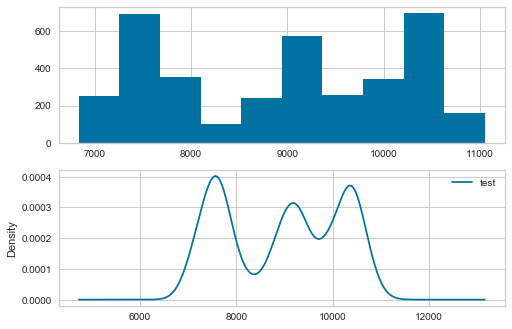

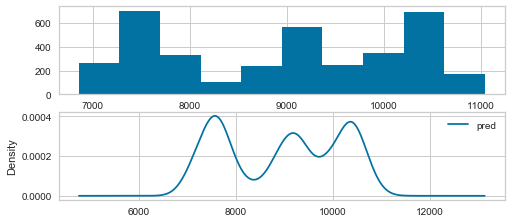

In [134]:
from pandas import Series
from matplotlib import pyplot
series = df_plot['y_test']
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde',label='test')
pyplot.legend()
series2 = df_plot['y_pred']
pyplot.figure(2)
pyplot.subplot(311)
series2.hist()
pyplot.subplot(312)
series2.plot(kind='kde',label='pred')
pyplot.legend()
pyplot.show()


In [135]:
##### Try lasso Regression

In [136]:
#clf = linear_model.Lasso(alpha=0)
clf=Lasso()
#clf=LinearRegression()
clf.fit(X_train2,y_train2)
y_pred2=clf.predict(X_test2)

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



In [137]:
lasso_train_score = clf.score(X_train2,y_train2)
lasso_train_score

0.9993717929588907

In [138]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

21.556691870973225

In [139]:
#rmse_val = rmse(y_test2, y_pred2)
#print("rms error is: " + str(rmse_val))

In [140]:
clf.coef_

array([ 7.75845522e+03,  1.16108763e+03,  5.56279359e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.02177978e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [141]:
#### Trying elastic net

In [142]:
#clf = linear_model.Lasso(alpha=0)
clf=ElasticNet()
#clf=LinearRegression()
clf.fit(X_train2,y_train2)
y_train_pred2 = clf.predict(X_train2)
y_pred2=clf.predict(X_test2)

In [143]:
lasso_train_score = clf.score(X_train2,y_train2)
lasso_train_score

0.9668640971852434

In [144]:
lasso_test_score = clf.score(X_test2,y_test2)
lasso_test_score

0.9670036473341334

In [145]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train2, y_train_pred2)

192.14197649378795

In [146]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

193.37857071907555

In [147]:
clf.coef_

array([ 49.59231953,  49.4588181 ,  49.57311232,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  49.61682473,
        49.61254629,  49.60093387,  49.5883442 ,  49.57408651,
        49.56493273,  49.55600444,  49.54755673,  49.53990647,
        49.53553375,  49.53255023,  49.53089551,  49.5285252 ,
        49.52825229,  49.52938663,  49.52998876,  49.53044331,
        49.52943847,  49.52773379,  49.43766276,  49.35896346,
        49.29610852,  49.23984357,  49.18763246,  49.14104042,
        49.09923317,  49.05988611,  49.02458923,  48.99052805,
        48.95673802,  48.92358779,  48.89324598,  48.86271243,
        48.83437797,  48.80735756,  48.78277144,  48.76128367,
        48.74114791,  49.57242886,  49.52721604,  49.48583907,
        49.44871684,  49.41440037,  49.38127604,  49.35

In [148]:
####### Principal Component Analysis on 0.3 cutoff

In [149]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(new_try_df, y, test_size=0.3, random_state=1)


In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca=scaler.transform(X_test_pca)

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.

C:\Users\megmishra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.



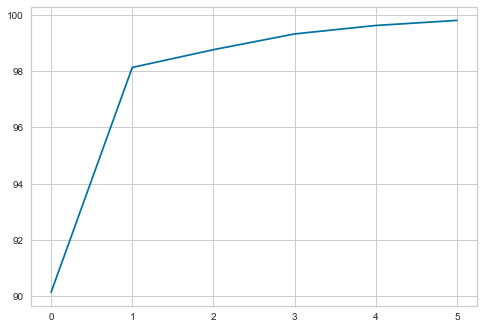

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents=pca.fit_transform(X_train_pca)
principalComponents_test=pca.transform(X_test_pca)
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [159]:
principalDf = pd.DataFrame(data = principalComponents)

principalDf_test = pd.DataFrame(data = principalComponents_test)

In [160]:
#clf = linear_model.Lasso(alpha=0)
clf=Ridge()
#clf=LinearRegression()
clf.fit(principalDf,y_train_pca)
y_pred_pca=clf.predict(principalDf_test)

In [161]:
rmse_val = rmse(y_test_pca, y_pred_pca)
print("rms error is: " + str(rmse_val))

rms error is: 44.43970144780164


In [162]:
mean_absolute_error(y_test_pca, y_pred_pca)

32.90467660379103

In [171]:
y_test_pca=pd.DataFrame(y_test_pca)
y_pred_pca=pd.DataFrame(y_pred_pca)
y_test_pca.columns=['y_test']
y_pred_pca.columns=['y_pred']
y_pred_pca.index=y_test_pca.index
principalDf_test.index=y_test_pca.index
df_plot_pca=pd.concat([principalDf_test,y_test_pca,y_pred_pca],axis=1)
df_plot_pca.head()

,0,1,2,3,4,5,y_test,y_pred
5339,15.616824,-5.319907,-0.005285,-0.574188,0.426350,1.228729,10416.0,10436.063653
5675,16.392864,-3.897895,-0.005550,-0.455177,0.471346,1.226213,10516.0,10494.152147
11354,-14.780479,-1.745456,-2.075180,0.215667,-0.907167,0.480643,7579.0,7572.828319
12915,-11.317722,-1.596420,0.002706,-0.255270,0.699720,-0.725219,7863.0,7887.197001
12509,-16.369089,-1.787600,0.004493,-0.253364,0.750727,-1.008699,7431.0,7418.042952


In [174]:
df_plot_pca['diff']=abs(df_plot_pca['y_test']-df_plot_pca['y_pred'])
#df_plot_pca['diff_bid_close']=abs(df_plot_pca['y_test']-df_plot_pca['bid_close']*10000)
sorted_df_pca=df_plot_pca.sort_values(by='diff',ascending=False)

In [175]:
sorted_df_pca.head()

,0,1,2,3,4,5,y_test,y_pred,diff
2947,14.002949,13.673642,-0.299839,-0.491526,0.057759,-0.156535,9738.0,10100.815659,362.815659
3274,11.964363,7.936379,-0.316773,-1.134866,-0.403702,-0.533697,10289.0,9968.891152,320.108848
2946,14.299539,11.177363,-0.307951,-0.795056,-0.192806,-0.309664,9887.0,10153.864991,266.864991
2949,13.036104,15.495086,-0.294417,-0.301142,0.191960,-0.183498,9744.0,9992.241765,248.241765
5997,5.993927,9.665693,0.023150,0.935885,1.415467,0.710720,9176.0,9387.485551,211.485551
